## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.drop(['id','date'], axis = 1, inplace=True)

In [4]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.shape

(21613, 19)

## Splitting X and Y

In [7]:
Y = data.pop('price')
X = data

## Some Preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler

XScaler = MinMaxScaler()
xScaled = XScaler.fit_transform(X)
X = pd.DataFrame(xScaled, columns=X.columns)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=456)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model_LR = LinearRegression().fit(X_train, Y_train).predict(X_test)

model_LR_score = r2_score(Y_test, model_LR)

print(model_LR_score)

0.7015120213348384


## Linear Regression with Regularization

In [12]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge(alpha=3).fit(X_train, Y_train).predict(X_test)

model_Ridge_score = r2_score(Y_test, model_Ridge)

print(model_Ridge_score)

0.7023132215291151


## PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_red = pd.DataFrame(pca.fit_transform(X))
X_red.head()

,0,1,2,3,4,5,6,7,8,9
0,0.459374,0.098904,-0.253580,0.237087,0.003074,-0.146846,-0.015888,0.068302,0.117190,0.017358
1,0.318133,0.378847,0.474533,0.019422,-0.783225,-0.048092,-0.108343,-0.121205,-0.023170,-0.022379
2,0.218159,-0.234979,0.043075,-0.403633,-0.047884,-0.092279,0.249207,0.097462,0.013157,0.053090
3,0.353757,-0.048416,-0.101853,0.100182,0.167613,0.135923,-0.356597,-0.149696,-0.111369,-0.023215
4,-0.055520,-0.044358,-0.114659,-0.112964,0.005769,-0.237185,-0.043458,-0.006514,0.118981,0.008884


## Train Test Split - PCA data

In [30]:
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_red, Y, train_size=0.7, random_state=456)

## Linear Regression - PCA data

In [31]:
model_LR = LinearRegression().fit(X_train_red, Y_train_red).predict(X_test_red)

model_LR_score1 = r2_score(Y_test_red, model_LR)
print(model_LR_score1)

0.6751501618840943


Linear Regression                        70.151202
Linear Regression with Regularization    70.231322
Linear Regression - PCA                  67.515016
dtype: float64

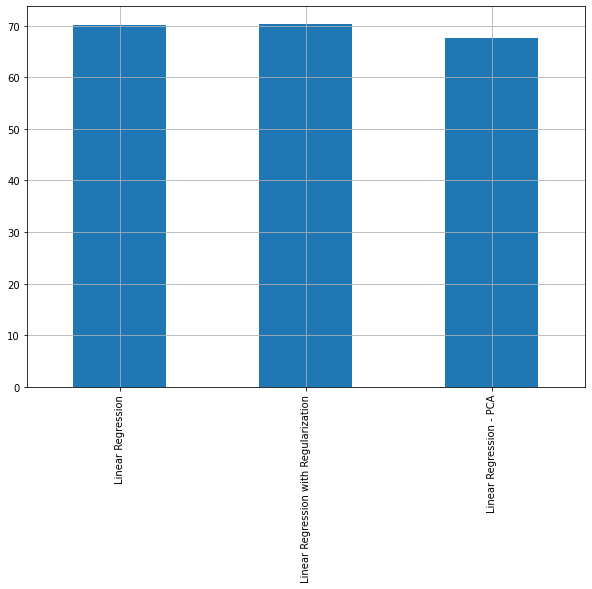

In [34]:
scores = {"Linear Regression" : model_LR_score*100,
          "Linear Regression with Regularization" : model_Ridge_score*100,
          "Linear Regression - PCA" : model_LR_score1*100}
scores = pd.Series(scores)

plt.figure(figsize=(10,7))
scores.plot(kind='bar', grid=True)
scores